In [34]:
import os
import dart_fss as dart
import pandas as pd
import matplotlib.pyplot as plt

corp_code = "035420"
corp_name = "NAVER"
# Open DART API KEY 설정
api_key=os.getenv("DART_API_KEY")
dart.set_api_key(api_key=api_key)

plt.rc("font", family="AppleGothic")

In [3]:
corp_fs = dart.fs.extract(corp_code=corp_code, bgn_de="20120101")
corp_fs.info

Annual reports:   0%|          | 0/12 [00:00<?, ?report/s]

{'corp_code': '035420',
 'bgn_de': '20120101',
 'end_de': None,
 'separate': False,
 'report_tp': 'annual',
 'lang': 'ko',
 'separator': True}

In [10]:
# 매출액, 당기순이익, 자본총계, 주가 데이터 가져오기
# tp - bs(재무상태표), is(손익계산서), cis(포괄손익계산서), cf(현금흐름표)
# 재무상태표 DataFrame
corp_bs_df = corp_fs.show("bs", show_concept=False)
# 포괄손익계산서 DataFrame
corp_cis_df = corp_fs.show("cis", show_concept=False)
# 포괄손익계산서 DataFrame
corp_cf_df = corp_fs.show("cf", show_concept=False)

label = ["2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

In [154]:
print("재무상태표")
print(corp_bs_df["[D210000] Statement of financial position, current/non-current - Consolidated financial statements (Unit: KRW)"]["label_ko"])
print("------------------")
print("포괄손익계산서")
print(corp_cis_df["[D431410] Statement of comprehensive income, by function of expense - Consolidated financial statements (Unit: KRW)"]["label_ko"])
print("------------------")
print("현금흐름표")
print(corp_cf_df["[D520000] Statement of cash flows, indirect method - Consolidated financial statements (Unit: KRW)"]["label_ko"])
print("------------------")
print("현금흐름표")
print(corp_cf_df["[D520000] Statement of cash flows, indirect method - Consolidated financial statements (Unit: KRW)"]["label_ko"])
print("------------------")

재무상태표
0                    유동자산
1                현금및현금성자산
2                  단기금융상품
3       당기손익-공정가치 측정 금융자산
4     기타포괄손익-공정가치 측정 금융자산
5               매출채권및기타채권
6                    재고자산
7                  기타유동자산
8                 당기법인세자산
9                  매각예정자산
10                  비유동자산
11                   유형자산
12                  사용권자산
13                   무형자산
14                 장기금융상품
15      당기손익-공정가치 측정 금융자산
16    기타포괄손익-공정가치 측정 금융자산
17           관계기업및공동기업 투자
18                이연법인세자산
19              매출채권및기타채권
20                기타비유동자산
21                   자산총계
22                   유동부채
23              매입채무및기타채무
24      당기손익-공정가치 측정 금융부채
25                  단기차입금
26                당기법인세부채
27                   충당부채
28                   리스부채
29                 기타유동부채
30                 매각예정부채
31                  비유동부채
32              매입채무및기타채무
33      당기손익-공정가치 측정 금융부채
34                     사채
35                  장기차입금
36                순확정급여부채
37                   충당부채
38    

In [57]:
# 재무상태표 분석
assets = corp_bs_df[corp_bs_df["[D210000] Statement of financial position, current/non-current - Consolidated financial statements (Unit: KRW)"]["class1"] == "자산 [abstract]"]
debt = corp_bs_df[corp_bs_df["[D210000] Statement of financial position, current/non-current - Consolidated financial statements (Unit: KRW)"]["class1"] == "부채 [abstract]"]

liquid_assets = assets[assets["[D210000] Statement of financial position, current/non-current - Consolidated financial statements (Unit: KRW)"]["class2"] == "유동자산"]
stationary_assets = assets[assets["[D210000] Statement of financial position, current/non-current - Consolidated financial statements (Unit: KRW)"]["class2"] == "비유동자산"]

liquid_assets_types = liquid_assets["[D210000] Statement of financial position, current/non-current - Consolidated financial statements (Unit: KRW)"]["class3"]
stationary_assets_types = stationary_assets["[D210000] Statement of financial position, current/non-current - Consolidated financial statements (Unit: KRW)"]["class3"]

liquid_debt = debt[debt["[D210000] Statement of financial position, current/non-current - Consolidated financial statements (Unit: KRW)"]["class2"] == "유동부채"]
stationary_debt = debt[debt["[D210000] Statement of financial position, current/non-current - Consolidated financial statements (Unit: KRW)"]["class2"] == "비유동부채"]

liquid_debt_types = liquid_debt["[D210000] Statement of financial position, current/non-current - Consolidated financial statements (Unit: KRW)"]["class3"]
stationary_debt_types = stationary_debt["[D210000] Statement of financial position, current/non-current - Consolidated financial statements (Unit: KRW)"]["class3"]

In [20]:
def from_cis_for(key: str) -> pd.DataFrame:
    key_df = corp_cis_df[corp_cis_df["[D431410] Statement of comprehensive income, by function of expense - Consolidated financial statements (Unit: KRW)"]["label_ko"] == key].loc[:, ["20130101-20131231", "20140101-20141231", "20150101-20151231", "20160101-20161231", "20170101-20171231", "20180101-20181231", "20190101-20191231", "20200101-20201231", "20210101-20211231", "20220101-20221231"]]
    key_values = key_df.to_numpy()
    return pd.DataFrame(key_values, index=[key], columns=label)

In [25]:
def from_bs_for(key: str) -> pd.DataFrame:
    key_df = corp_bs_df[corp_bs_df["[D210000] Statement of financial position, current/non-current - Consolidated financial statements (Unit: KRW)"]["label_ko"] == key].loc[:, ["20131231", "20141231", "20151231", "20161231", "20171231", "20181231", "20191231", "20201231", "20211231", "20221231"]]
    key_values = key_df.to_numpy()
    return pd.DataFrame(key_values, index=[key], columns=label)

In [22]:
# 매출액, 당기순이익 계산
total_sales_df = from_cis_for("영업수익")
net_profit_during_term_df = from_cis_for("당기순이익")
result_df = pd.concat([total_sales_df, net_profit_during_term_df])
result_df

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
영업수익,"2,259,138,612,000.0","2,758,478,837,030.0","3,253,930,352,202.0","4,022,629,619,982.0","4,678,468,928,032.0","3,676,315,688,961.0","4,356,239,667,491.0","5,304,145,900,386.0","6,817,599,707,250.0","8,220,078,708,810.0"
당기순이익,"1,895,289,315,000.0","451,763,103,073.0","516,986,279,540.0","759,072,951,187.0","770,101,670,207.0","627,901,873,332.0","396,821,062,465.0","844,996,977,149.0","16,477,625,559,645.0","673,180,300,087.0"


In [26]:
capital_df = from_bs_for("자본총계")
result_df = pd.concat([result_df, capital_df])
result_df

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
영업수익,"2,259,138,612,000.0","2,758,478,837,030.0","3,253,930,352,202.0","4,022,629,619,982.0","4,678,468,928,032.0","3,676,315,688,961.0","4,356,239,667,491.0","5,304,145,900,386.0","6,817,599,707,250.0","8,220,078,708,810.0"
당기순이익,"1,895,289,315,000.0","451,763,103,073.0","516,986,279,540.0","759,072,951,187.0","770,101,670,207.0","627,901,873,332.0","396,821,062,465.0","844,996,977,149.0","16,477,625,559,645.0","673,180,300,087.0"
자본총계,"1,475,309,016,000.0","1,797,418,214,955.0","2,269,578,519,488.0","4,129,598,862,940.0","5,305,186,234,949.0","5,949,140,513,293.0","6,503,926,068,580.0","8,255,132,035,213.0","24,027,376,349,275.0","23,450,322,480,451.0"


<Axes: title={'center': '네이버 10년치 재무제표 주요항목'}, xlabel='연도', ylabel='원'>

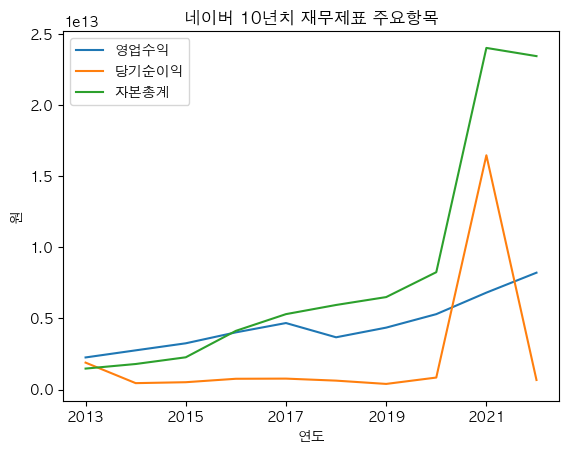

In [37]:
result_df.transpose().plot(title="네이버 10년치 재무제표 주요항목", xlabel="연도", ylabel="원")